<a href="https://colab.research.google.com/github/SwathiR1999/building_SOM/blob/main/building_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display.

MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM).

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=3cace0e4b9eaa6f5787d3109d982d8fe38eff87016ecdcdec2cca72efa1f130f
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('CreditCard.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5) # initialization of 10x10 SOM
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100) # trains the SOM with 100 iterations

We can obtain the position of the winning neuron on the map for a given sample as follows:

`som.winner(data[0])`

##Visualizing the results


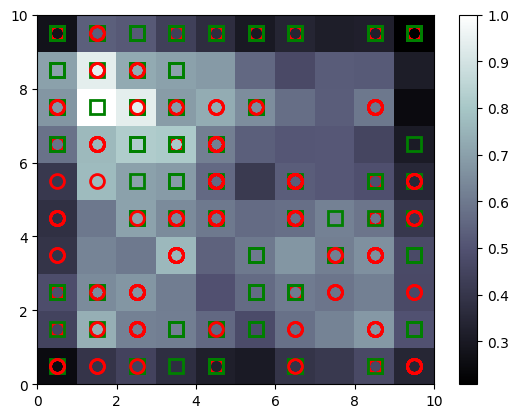

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [8]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15567839
15579583
15642336
15668679
15738487
15773421
15682686
15809837
15636521
15707602
15815095
15720725
15567834
15591035
15672912
15694677
15598614
15608804
15631267
15611189
15759387
15712483
15572361
15698522
